# Bivariate Variable

In [1]:
import numpy as np
rng = np.random.default_rng(seed=6870)

We use as an example the bivariate random variable: (height, weight) of a person.

## Simulación de datos

Simulamos datos para una población de:

In [2]:
population = 100000

Generamos los datos. La distribución la vamos a ver más adelante.

In [3]:
from scipy.stats import multivariate_normal
mean_height_cm = 159
mean_weight_kg = 62.5
height_sigma_cm = 10
weight_sigma_kg = 7
correlation = 0.7
mean = np.array([mean_height_cm, mean_weight_kg])
cov = np.empty(shape=(2,2))
cov[0, 0] = height_sigma_cm**2
cov[0, 1] = cov[1,0] = correlation*height_sigma_cm*weight_sigma_kg
cov[1, 1] = weight_sigma_kg**2
data = multivariate_normal.rvs(mean, cov, size=population, random_state=rng)

Pasamos los datos a un dataframe de pandas para manipularlos con más comodidad. Mostramos los primeros datos generados.

In [4]:
import pandas as pd
df = pd.DataFrame({"Height": data[:,0], "Weight": data[:,1]})
df.head(10)

,Height,Weight
0,165.001874,70.252770
1,167.276683,63.351130
2,149.131905,63.320355
3,158.205529,73.635976
4,176.012090,61.904580
5,143.769103,51.282460
6,160.878643,58.567084
7,146.254344,49.283383
8,164.616309,58.560677
9,172.873798,67.150514


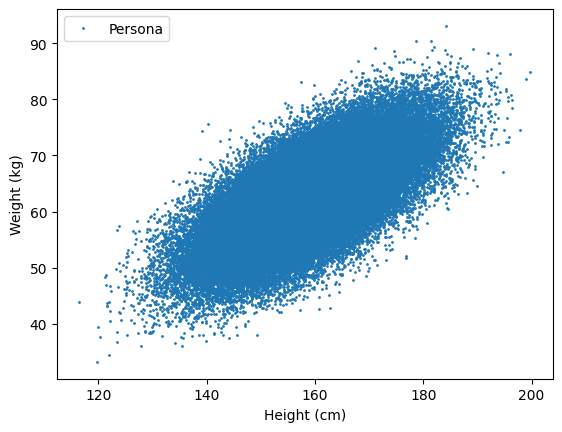

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(df["Height"], df["Weight"], ls='None', marker='o', ms=1, label="Persona")
ax.legend()

## PDF marginales

PDF marginal de la altura $g_X(x)$

In [6]:
x = 163
delta_x = 2
selected_people_x = df[ (x < df["Height"]) & (df["Height"] < x+delta_x) ]
selected_people_x.head()

,Height,Weight
8,164.616309,58.560677
23,164.053391,61.345574
38,163.202155,61.873345
52,163.305915,53.807014
87,164.477165,59.369072


In [7]:
nselected_x = len(selected_people_x)
nselected_x

7035

In [8]:
marginal_proba_x = nselected_x / population
marginal_proba_x

0.07035

In [9]:
marginal_pdf_x =  marginal_proba_x / delta_x
marginal_pdf_x
print(f"{marginal_pdf_x:.3} cm⁻¹")

0.0352 cm⁻¹


Text(0.75, 0.25, '7035')

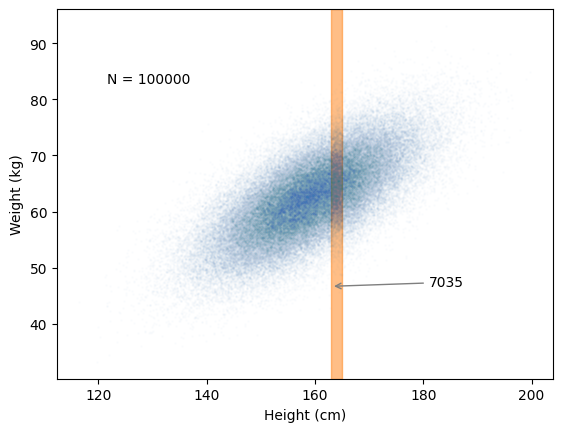

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(df["Height"], df["Weight"], ls='None', marker='o', ms=1, alpha=0.01, label="Persona")
ax.axvspan(x, x + delta_x, color='tab:orange', alpha=0.5)
ax.text(0.1, 0.8, f"N = {population}", transform=ax.transAxes)
ax.annotate(f"{nselected_x}", xy=(x, 0.25), xycoords=('data', 'axes fraction'), xytext=(0.75, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )

PDF marginal del peso $g_Y(y)$

In [11]:
y = 66
delta_y = 2
selected_people_y = df[ (y < df["Weight"]) & (df["Weight"] < y+delta_y) ]
nselected_y = len(selected_people_y)
marginal_proba_y = nselected_y / population
marginal_pdf_y = marginal_proba_y / delta_y
marginal_pdf_y
print(f"{marginal_pdf_y:.3} kg⁻¹")

0.0465 kg⁻¹


Text(0.15, 0.15, '9296')

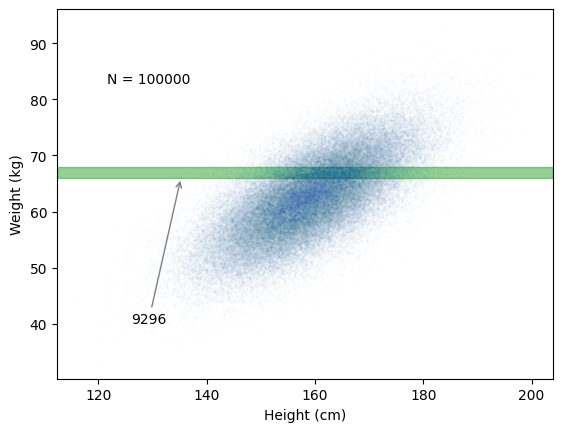

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(df["Height"], df["Weight"], ls='None', marker='o', ms=1, alpha=0.01, label="Persona")
ax.axhspan(y, y + delta_y, color='tab:green', alpha=0.5)
ax.text(0.1, 0.8, f"N = {population}", transform=ax.transAxes)
ax.annotate(f"{nselected_y}", xy=(0.25, y), xycoords=('axes fraction', 'data'), xytext=(0.15, 0.15), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )

## PDF conjunta $f(x,y)$

In [13]:
selected_people_xy = df[ (x < df["Height"]) & (df["Height"] < x+delta_x) & (y < df["Weight"]) & (df["Weight"] < y+delta_y) ]
nselected_xy = len(selected_people_xy)
nselected_xy

1009

In [14]:
joint_proba = nselected_xy / population
joint_proba

0.01009

In [15]:
joint_pdf = joint_proba / (delta_x * delta_y)
joint_pdf
print(f"{joint_pdf:.3} cm⁻¹ kg⁻¹")

0.00252 cm⁻¹ kg⁻¹


Text(0.75, 0.25, '1009')

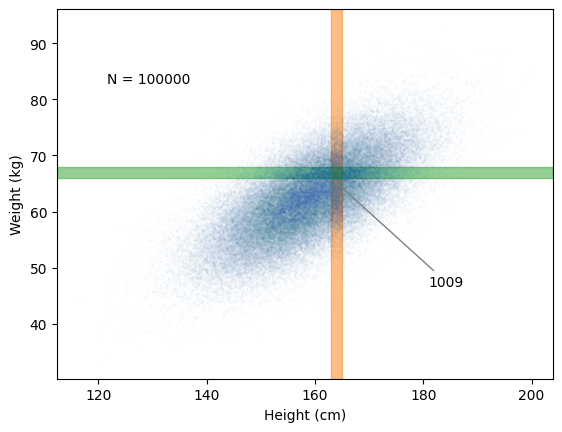

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(df["Height"], df["Weight"], ls='None', marker='o', ms=1, alpha=0.01, label="Persona")
ax.axvspan(x, x + delta_x, color='tab:orange', alpha=0.5)
ax.axhspan(y, y + delta_y, color='tab:green', alpha=0.5)
ax.text(0.1, 0.8, f"N = {population}", transform=ax.transAxes)
ax.annotate(f"{nselected_xy}", xy=(x, y), xycoords='data', xytext=(0.75, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )

## PDFs condicionales

PDF condicional del peso dada la altura $h_{Y|X}(y|x)$

In [17]:
nselected_x

7035

In [18]:
nselected_xy

1009

In [19]:
conditional_proba_y = nselected_xy / nselected_x
conditional_proba_y

0.14342572850035537

In [20]:
conditional_pdf_y = conditional_proba_y / delta_y
conditional_pdf_y
print(f"{conditional_pdf_y:.3} kg⁻¹")

0.0717 kg⁻¹


Text(0.75, 0.25, '1009')

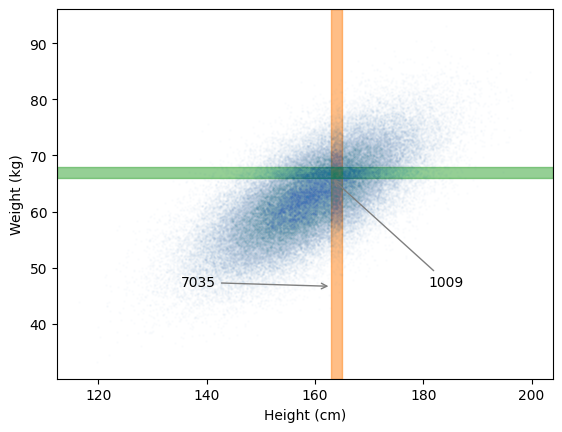

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(df["Height"], df["Weight"], ls='None', marker='o', ms=1, alpha=0.01, label="Persona")
ax.axvspan(x, x + delta_x, color='tab:orange', alpha=0.5)
ax.axhspan(y, y + delta_y, color='tab:green', alpha=0.5)
ax.annotate(f"{nselected_x}", xy=(x, 0.25), xycoords=('data', 'axes fraction'), xytext=(0.25, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )
ax.annotate(f"{nselected_xy}", xy=(x, y), xycoords='data', xytext=(0.75, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )

PDF condicional de la altura dado el peso $h_{X|Y}(x|y)$

In [22]:
conditional_proba_x = nselected_xy / nselected_y
conditional_pdf_x = conditional_proba_x / delta_x
conditional_pdf_x
print(f"{conditional_pdf_x:.3} cm⁻¹")

0.0543 cm⁻¹


Text(0.75, 0.25, '1009')

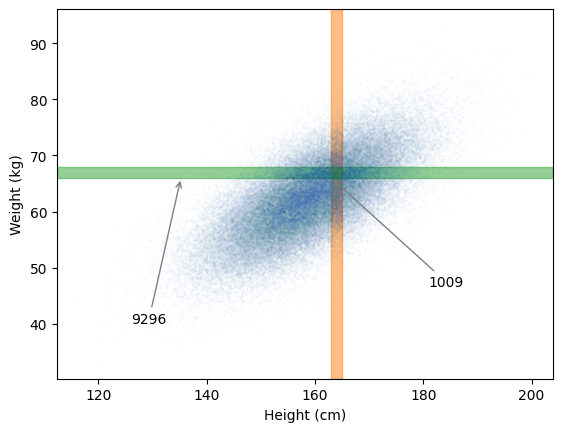

In [23]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(df["Height"], df["Weight"], ls='None', marker='o', ms=1, alpha=0.01, label="Persona")
ax.axvspan(x, x + delta_x, color='tab:orange', alpha=0.5)
ax.axhspan(y, y + delta_y, color='tab:green', alpha=0.5)
ax.annotate(f"{nselected_y}", xy=(0.25, y), xycoords=('axes fraction', 'data'), xytext=(0.15, 0.15), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )
ax.annotate(f"{nselected_xy}", xy=(x, y), xycoords='data', xytext=(0.75, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc", color="tab:gray") 
            )